In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
sns.set_palette(sns.cubehelix_palette(33, rot=.2)[::-1])

In [3]:
apps = pd.read_csv('googleplaystore.csv')

In [4]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Нас интересует рейтинг приложений и кол-во их скачиваний. Нам хочется понять, какие приложения получают много скачиваний и высокий рейтинг

Для этого мы изучим то, как другие переменные вляют на наши целевые, и как все они взаимосвязаны

Проанализировав имеющиеся данные, проверим несколько гипотез и выделим наиболее значимые инсайты

Но сначала подготовим данные к работе

# Очистка и форматирование данных

In [5]:
# информация о таблице
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
apps.App.describe()

count      10841
unique      9660
top       ROBLOX
freq           9
Name: App, dtype: object

В таблице есть повторяющиеся приложения

In [7]:
pd.DataFrame(apps.groupby('App').App.count().loc[apps.groupby('App').App.count() > 1])\
    .rename(columns={'App': 'Count'}).reset_index().sort_values(by='Count', ascending=False)

,App,Count
570,ROBLOX,9
102,"CBS Sports App - Scores, News, Stats & Watch Live",8
211,Duolingo: Learn Languages Free,7
218,ESPN,7
6,8 Ball Pool,7
...,...,...
301,Golfshot: Golf GPS + Tee Times,2
302,Google,2
305,Google Analytics,2
311,Google Duo - High Quality Video Calls,2


798 приложений появляются больше одного раза

### Удаление дубликатов

In [8]:
apps[apps.App == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [9]:
apps[apps.App == 'Google']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3234,Google,TOOLS,4.4,8033493,Varies with device,"1,000,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
4150,Google,TOOLS,4.4,8021623,Varies with device,"1,000,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device


Дубликаты приложений отличаются только количеством отзывов, и только на небольшое количество. Поэтому я удалю дубликаты, оставив версию с наибольшим количеством отзывов

In [10]:
apps.drop_duplicates(subset=['App'], keep='first', inplace=True)

In [11]:
apps[apps.App == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [12]:
apps.App.describe()

count                                               9660
unique                                              9660
top       Photo Editor & Candy Camera & Grid & ScrapBook
freq                                                   1
Name: App, dtype: object

In [13]:
apps['Android Ver'].describe()

count           9657
unique            33
top       4.1 and up
freq            2202
Name: Android Ver, dtype: object

Удалим признаки "Current Ver", "Last Updated" и "Android Ver". Версия приложения и дата последнего обновления по большей части бесполезны, как и версия андроида

In [14]:
apps.drop(columns=['Current Ver', 'Android Ver', 'Last Updated'], inplace=True)

Мы не знаем содержание отзывов, только их количество. Вряд ли с таким количеством информации получится сделать адекватных вывод о взаимосвязи отзывов с другими переменными. Поэтому столбец Reviews удалим

In [15]:
apps.drop(columns=['Reviews'], inplace=True)

In [16]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Size            9660 non-null   object 
 4   Installs        9660 non-null   object 
 5   Type            9659 non-null   object 
 6   Price           9660 non-null   object 
 7   Content Rating  9659 non-null   object 
 8   Genres          9660 non-null   object 
dtypes: float64(1), object(8)
memory usage: 754.7+ KB


Rating, Type и Content Rating имеют null значения

### Избавляемся от Null значений

In [17]:
apps.Rating.isnull().sum()

1463

In [18]:
apps[apps.Rating.isnull()]

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure
113,Wrinkles and rejuvenation,BEAUTY,NaN,5.7M,"100,000+",Free,0,Everyone 10+,Beauty
123,Manicure - nail design,BEAUTY,NaN,3.7M,"50,000+",Free,0,Everyone,Beauty
126,Skin Care and Natural Beauty,BEAUTY,NaN,7.4M,"100,000+",Free,0,Teen,Beauty
129,"Secrets of beauty, youth and health",BEAUTY,NaN,2.9M,"10,000+",Free,0,Mature 17+,Beauty
...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,82M,"10,000+",Free,0,Everyone,Medical
10825,Naruto & Boruto FR,SOCIAL,NaN,7.7M,100+,Free,0,Teen,Social
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation
10835,FR Forms,BUSINESS,NaN,9.6M,10+,Free,0,Everyone,Business


In [19]:
apps.drop(apps[apps.Rating.isnull()].index, inplace=True)

In [20]:
apps[apps.Type.isnull()]

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres


In [21]:
apps[apps['Content Rating'].isnull()]

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


Категория приложения отсутствует, а другие признаки находятся не в тех колонках. Поэтому просто удалю это приложение

In [22]:
apps.drop(apps.loc[apps.App == 'Life Made WI-Fi Touchscreen Photo Frame'].index, inplace=True)

In [23]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Size            8196 non-null   object 
 4   Installs        8196 non-null   object 
 5   Type            8196 non-null   object 
 6   Price           8196 non-null   object 
 7   Content Rating  8196 non-null   object 
 8   Genres          8196 non-null   object 
dtypes: float64(1), object(8)
memory usage: 640.3+ KB


### Форматируем данные

In [24]:
# Проверим категории на ошибки и опечатки
apps.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [25]:
apps.Size.value_counts().head()

Varies with device    1169
14M                    149
12M                    146
11M                    144
13M                    143
Name: Size, dtype: int64

Нужно сделать что-то с "Varies from device", а также конвертировать все значения в Мб. 'Varies' заменю средним значением

In [26]:
# Временно заменяем на NaN
apps.loc[apps.Size == 'Varies with device', 'Size'] = 'NaN'

In [27]:
apps.Size=apps.Size.str.replace('k','e+3')
apps.Size=apps.Size.str.replace('M','e+6')

In [28]:
apps.Size.value_counts()

NaN       1169
14e+6      149
12e+6      146
11e+6      144
13e+6      143
          ... 
383e+3       1
454e+3       1
812e+3       1
442e+3       1
619e+3       1
Name: Size, Length: 414, dtype: int64

In [29]:
apps.Size = apps.Size.apply(lambda x: float(x))

In [30]:
apps.Size.isnull().sum()

1169

In [31]:
apps['Size'].fillna(apps.groupby('Category')['Size'].transform('mean'),inplace = True)

In [32]:
apps.Size.isnull().sum()

0

In [33]:
apps[apps.Size == 0]

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres


In [34]:
apps.Size = apps.Size.apply(lambda x: round(x / 1000000, 2))

In [35]:
apps.rename(columns={'Size': 'Size_Mb'}, inplace=True)

In [36]:
apps.head()

,App,Category,Rating,Size_Mb,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19.0,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25.0,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [37]:
apps.Installs.value_counts()

1,000,000+        1415
100,000+          1094
10,000+            987
10,000,000+        937
1,000+             697
5,000,000+         607
500,000+           504
50,000+            457
5,000+             425
100+               303
50,000,000+        202
500+               199
100,000,000+       188
10+                 69
50+                 56
500,000,000+        24
1,000,000,000+      20
5+                   9
1+                   3
Name: Installs, dtype: int64

Конвертируем значения скачиваний в числовой формат

In [38]:
apps.Installs=apps.Installs.apply(lambda x: x.strip('+'))
apps.Installs=apps.Installs.apply(lambda x: x.replace(',',''))

In [39]:
apps.Installs=pd.to_numeric(apps.Installs)

In [40]:
apps.Installs.value_counts()

1000000       1415
100000        1094
10000          987
10000000       937
1000           697
5000000        607
500000         504
50000          457
5000           425
100            303
50000000       202
500            199
100000000      188
10              69
50              56
500000000       24
1000000000      20
5                9
1                3
Name: Installs, dtype: int64

In [41]:
apps.Type.value_counts()

Free    7592
Paid     604
Name: Type, dtype: int64

In [42]:
apps.Price.value_counts()

0          7592
$2.99       109
$0.99       104
$4.99        68
$1.99        59
           ... 
$1.59         1
$6.49         1
$1.29         1
$299.99       1
$1.20         1
Name: Price, Length: 73, dtype: int64

Конвертируем стоимость в числовой формат

In [43]:
apps.Price=apps.Price.apply(lambda x: x.strip('$'))

In [44]:
apps.Price=pd.to_numeric(apps.Price)

Проверим, есть ли приложения типа "Free" с ценой > 0 и наоборот

In [45]:
apps[(apps.Type == 'Free') & (apps.Price > 0)]

,App,Category,Rating,Size_Mb,Installs,Type,Price,Content Rating,Genres


In [46]:
apps[(apps.Type == 'Paid') & (apps.Price == 0)]

,App,Category,Rating,Size_Mb,Installs,Type,Price,Content Rating,Genres


In [47]:
apps['Content Rating'].value_counts()

Everyone           6618
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Уберем пробел в названии столбца, чтобы к нему можно было в будущем обращаться через точку, и чтобы у названий столбцов сохранялся общий стиль

In [48]:
apps.rename(columns={'Content Rating' : 'Content_Rating'}, inplace=True)

In [49]:
apps.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

Разделим столбец жанр на два

In [50]:
primary = apps.Genres.apply(lambda x: x.split(';')[0])
apps['Primary_Genres'] = primary

In [51]:
secondary = apps.Genres.apply(lambda x: x.split(';')[-1])
apps['Secondary_Genres'] = secondary

In [52]:
apps.drop(columns=['Genres'], inplace=True)

In [53]:
apps.head()

,App,Category,Rating,Size_Mb,Installs,Type,Price,Content_Rating,Primary_Genres,Secondary_Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19.0,10000,Free,0.0,Everyone,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7,5000000,Free,0.0,Everyone,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25.0,50000000,Free,0.0,Teen,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8,100000,Free,0.0,Everyone,Art & Design,Creativity


In [54]:
apps.Primary_Genres.value_counts()

Tools                      718
Entertainment              502
Education                  498
Action                     304
Lifestyle                  302
Finance                    302
Productivity               301
Personalization            298
Medical                    290
Sports                     270
Business                   263
Photography                263
Communication              257
Health & Fitness           246
Casual                     217
News & Magazines           204
Social                     203
Simulation                 200
Travel & Local             187
Arcade                     185
Shopping                   180
Books & Reference          171
Video Players & Editors    150
Dating                     134
Puzzle                     123
Maps & Navigation          118
Role Playing               111
Racing                     103
Strategy                    95
Food & Drink                94
Educational                 93
Adventure                   78
Auto & V

In [55]:
apps[apps.Primary_Genres == 'Music & Audio']

,App,Category,Rating,Size_Mb,Installs,Type,Price,Content_Rating,Primary_Genres,Secondary_Genres
2142,Toy Guitar with songs for kids,FAMILY,4.3,9.8,500000,Free,0.0,Everyone,Music & Audio,Music & Video


In [56]:
# Заменяем Music & Audio на Music
apps.loc[apps.Primary_Genres == 'Music & Audio', 'Primary_Genres'] = 'Music'

In [57]:
apps.Category.value_counts().head(10)

FAMILY             1608
GAME                912
TOOLS               718
FINANCE             302
PRODUCTIVITY        301
LIFESTYLE           301
PERSONALIZATION     298
MEDICAL             290
BUSINESS            263
PHOTOGRAPHY         263
Name: Category, dtype: int64

In [58]:
apps.Primary_Genres.value_counts().head(10)

Tools              718
Entertainment      502
Education          498
Action             304
Lifestyle          302
Finance            302
Productivity       301
Personalization    298
Medical            290
Sports             270
Name: Primary_Genres, dtype: int64

In [59]:
apps.Secondary_Genres.value_counts().head(10)

Tools              717
Education          518
Entertainment      471
Finance            302
Productivity       301
Lifestyle          300
Personalization    298
Action             292
Medical            290
Sports             266
Name: Secondary_Genres, dtype: int64

Значения столбцов Category, Primary_Genres и Secondary_Genres очень похожи и могут совпадать для определенных приложений. Поэтому я удалю столбцы Primary_Genres и Secondary_Genres

In [60]:
apps.drop(columns=['Primary_Genres'], inplace=True)

In [61]:
apps.drop(columns=['Secondary_Genres'], inplace=True)

### Итоговая таблица иммет следующий вид:

In [62]:
apps.head(10)

,App,Category,Rating,Size_Mb,Installs,Type,Price,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19.0,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25.0,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8,100000,Free,0.0,Everyone
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.6,50000,Free,0.0,Everyone
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,19.0,50000,Free,0.0,Everyone
7,Infinite Painter,ART_AND_DESIGN,4.1,29.0,1000000,Free,0.0,Everyone
8,Garden Coloring Book,ART_AND_DESIGN,4.4,33.0,1000000,Free,0.0,Everyone
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,3.1,10000,Free,0.0,Everyone


# EDA (Разведочный анализ данных)

## Pairplot для количественных признаков

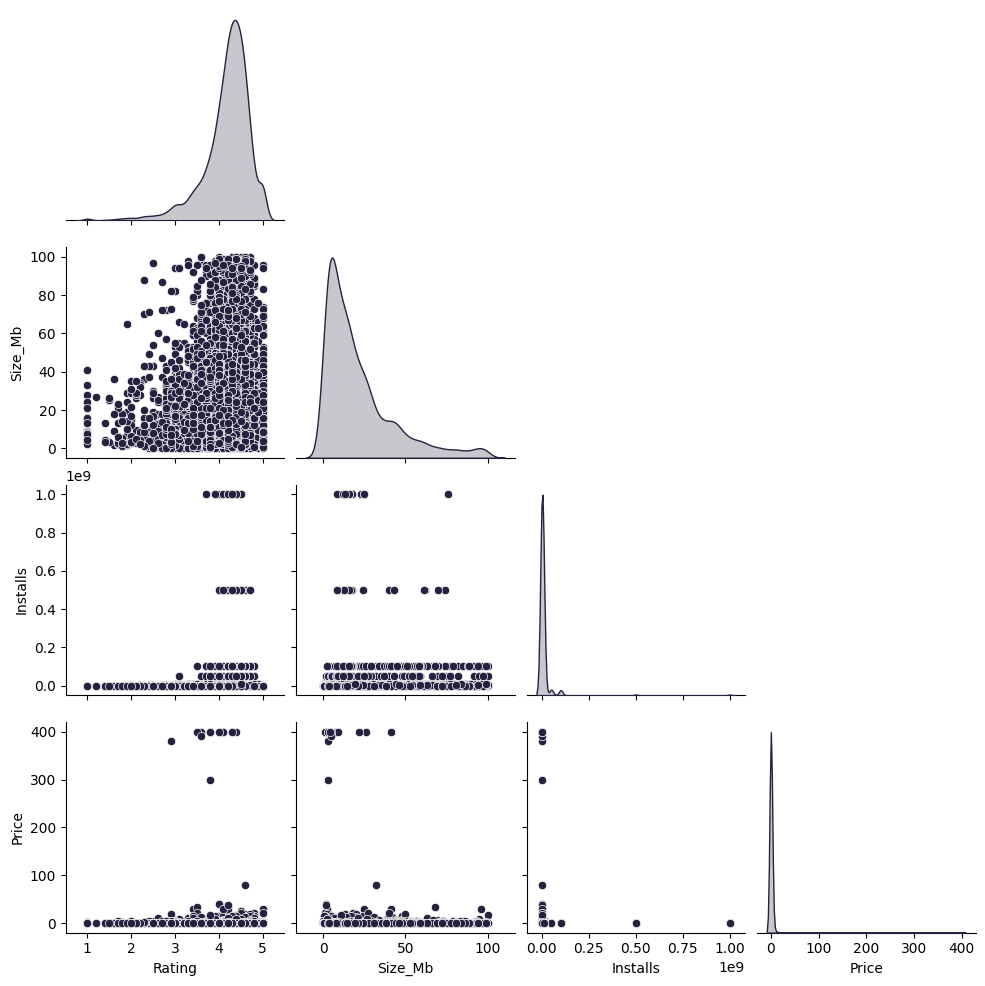

In [63]:
sns.pairplot(apps, corner=True, diag_kind='kde')

##### Как видим, все количественные признаки распределены ненормально

## Категориальные признаки

### Category

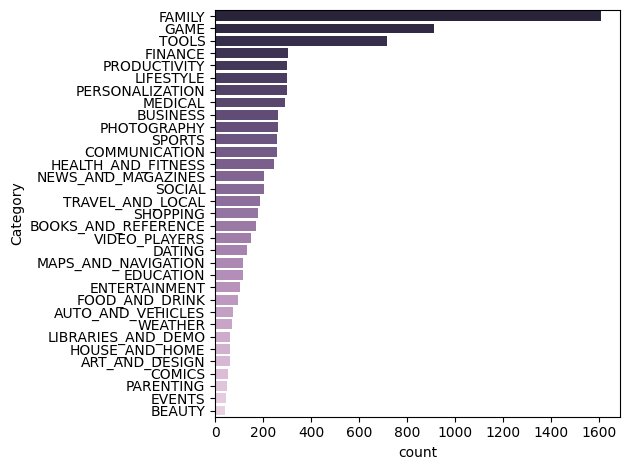

In [64]:
sns.countplot(y=apps.Category, order=apps['Category'].value_counts().index)
plt.tight_layout()

##### Больше всего приложений в категориях Family, Game и Tools

### Type (Free/Paid)

([<matplotlib.patches.Wedge at 0x18c5cec2440>,
 [Text(-1.070651124323107, 0.2524008121731531, 'Free'),
  Text(1.0706511361388402, -0.2524007620523571, 'Paid')],
 [Text(-0.5839915223580582, 0.1376731702762653, '92.6%'),
  Text(0.5839915288030038, -0.13767314293764932, '7.4%')])

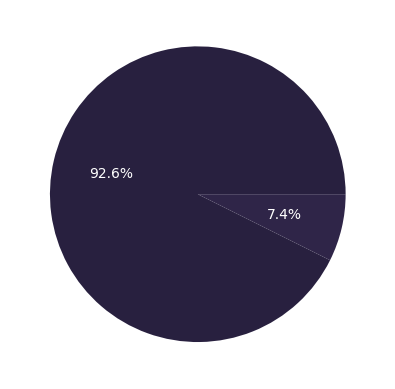

In [87]:
plt.pie(apps['Type'].value_counts(sort=True), labels=apps['Type'].value_counts(sort=True).index, autopct='%1.1f%%',
        textprops={'color': 'white'})

##### Бесплатные приложения сильно преобладают на рынке

### Content Rating

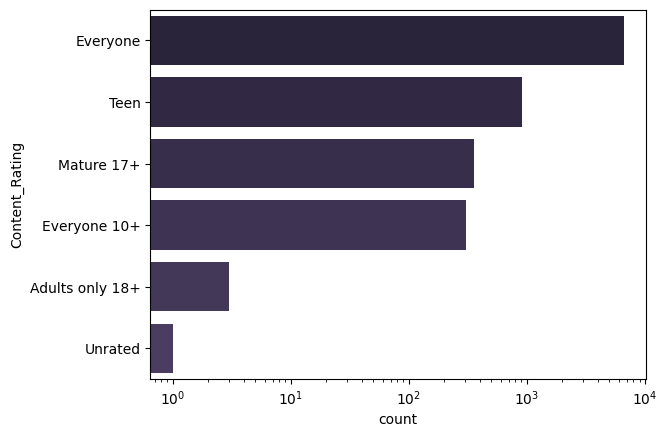

In [66]:
sns.countplot(y=apps.Content_Rating, order=apps['Content_Rating'].value_counts().index)
plt.xscale('log')

##### На рынке преобладают приложения для всех возрастов (Everyone)

### Installs

Text(0, 0.5, '')

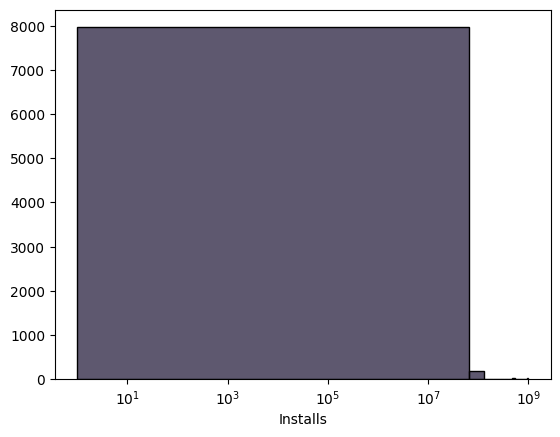

In [67]:
sns.histplot(apps.Installs, bins=15)
plt.xscale('log')
plt.ylabel(None)

In [68]:
# % приложений с кол-вом установок < 10^8
100 * apps[apps.Installs < 100000000].App.count() / apps.App.count()

97.16935090287946

##### Большую часть приложений устанавливают менее 10^8 раз

## Взаимосвязи переменных

### Популярность приложения и его рейтинг

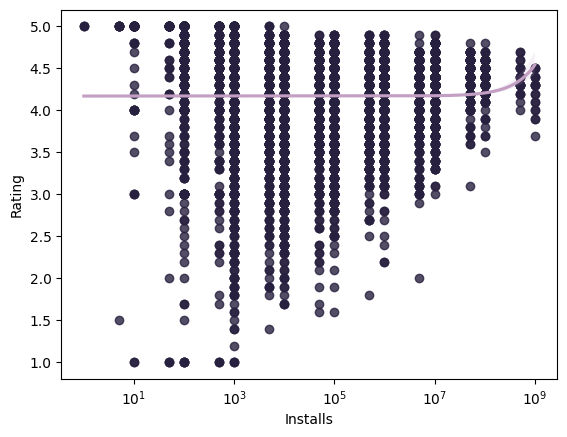

In [69]:
sns.regplot(x="Installs", y="Rating",data=apps, line_kws={"color": "#c29fc3"})
plt.xscale('log')

Приложения с большим количеством установок имеют чуть больший рейтинг в среднем

Проверим, как сильно влияет количество установок на рейтинг с помощью коэффициента корреляции Спирмена (коэффициент корреляции Пирсона использовать не можем, т.к. признаки распределены ненормально)

<b>Порог значимости</b>: alpha = 0.05  
<b>Нулевая гипотеза</b>: Статистически значимая связь между переменными отсутствует

In [70]:
stats.spearmanr(apps.Installs, apps.Rating)

SpearmanrResult(correlation=0.027296334350120834, pvalue=0.013463458702114359)

Коэффициент корреляции Спирмена показывает статистически значимую, но очень слабую взаимосвязь

In [71]:
# Посчитаем коэф. Спирмена для большинства приложений (Installs < 10^8)
stats.spearmanr(apps[apps.Installs < 100000000].Installs, apps[apps.Installs < 100000000].Rating)

SpearmanrResult(correlation=0.011482743411910143, pvalue=0.3055485392414167)

p-value > alpha (0.05), следовательно, не можем отвергуть нулевую гипотезу об отсутствии статистически значимой связи, но даже если бы эта корреляция была статистически значима, она слишком незначительна, чтобы ее учитывать

#### Вывод: Популярность приложения не влияет на его рейтинг

### Как отличается рейтинг платных и бесплатных приложений

Text(5.069444444444445, 0.5, '')

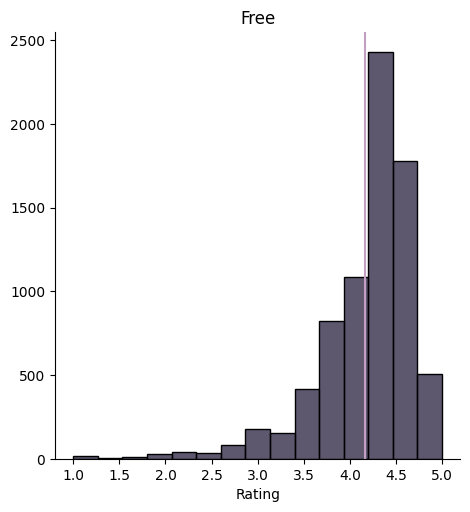

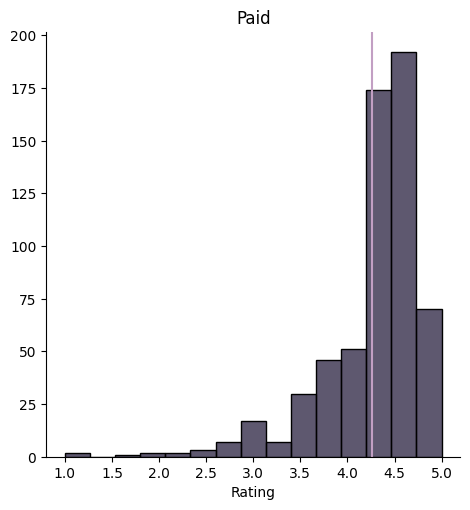

In [72]:
sns.displot(apps[apps.Type == 'Free']['Rating'], bins=15).set(title='Free')
plt.axvline(apps[apps.Type == 'Free']['Rating'].mean(), color='#c29fc3')
plt.ylabel(None)
sns.displot(apps[apps.Type == 'Paid']['Rating'], bins=15).set(title='Paid')
plt.axvline(apps[apps.Type == 'Paid']['Rating'].mean(), color='#c29fc3')
plt.ylabel(None)

In [73]:
apps[apps.Type == 'Free']['Rating'].mean(), apps[apps.Type == 'Paid']['Rating'].mean()

(4.166372497365648, 4.259602649006623)

Средние выборок отличаются, но непонятно, является ли различие статистически значимым. Выборки распределены похожим образом

[Text(0.5, 1.0, 'Free')]

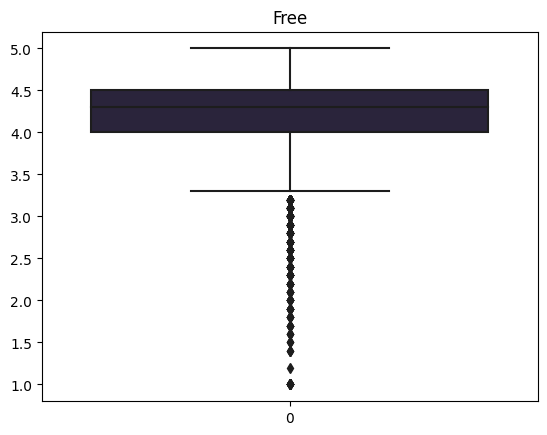

In [74]:
sns.boxplot(apps.loc[apps.Type == 'Free', 'Rating']).set(title='Free')

[Text(0.5, 1.0, 'Paid')]

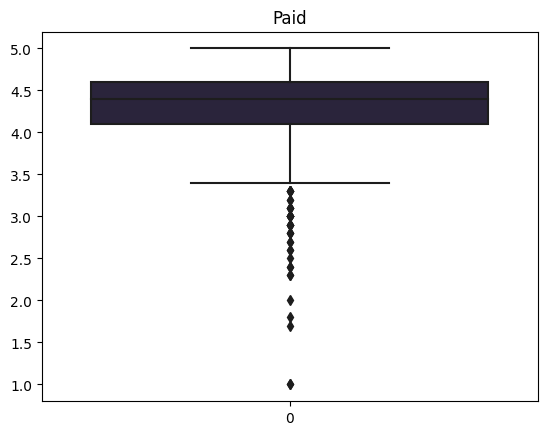

In [75]:
sns.boxplot(apps[apps.Type == 'Paid']['Rating'].reset_index(drop=True)).set(title='Paid')

Выборки распределены не нормально, их размеры значительно отличаются, а еще присутствуют выбросы. Для сравнения выборок применим критерий Уилкоксона-Манна-Уитни (устойчив к выбросам)

<b>Порог значимости</b>: alpha = 0.05  
<b>Нулевая гипотеза</b>: Средние значения рейтинга для платных и бесплатных приложений равны

In [76]:
stats.ranksums(apps[apps.Type == 'Free']['Rating'], apps[apps.Type == 'Paid']['Rating'])

RanksumsResult(statistic=-6.406183218438371, pvalue=1.492076475346005e-10)

p-value < 0.05, отвергаем нулевую гипотезу о равенстве средних значений выборок

Таким образом, средний рейтинг для платных и бесплатных приложений статистически значимо различается

In [77]:
apps[apps.Type == 'Free']['Rating'].mean(), apps[apps.Type == 'Paid']['Rating'].mean()

(4.166372497365648, 4.259602649006623)

#### Вывод: Платные приложения в среднем оцениваются выше

### Рейтинг приложений по категориям

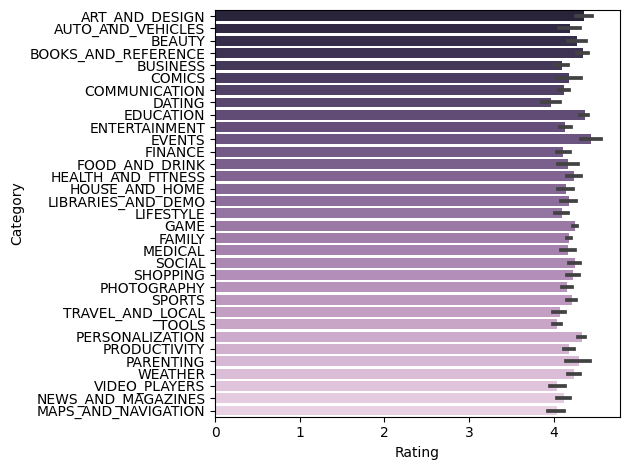

In [78]:
sns.barplot(x=apps.Rating, y=apps.Category)
plt.tight_layout()

In [79]:
apps.groupby('Category')['Rating'].mean().sort_values(ascending=False)

Category
EVENTS                 4.435556
EDUCATION              4.364407
ART_AND_DESIGN         4.357377
BOOKS_AND_REFERENCE    4.344970
PERSONALIZATION        4.332215
PARENTING              4.300000
BEAUTY                 4.278571
GAME                   4.247368
SOCIAL                 4.247291
WEATHER                4.243056
HEALTH_AND_FITNESS     4.243033
SHOPPING               4.230000
SPORTS                 4.216154
AUTO_AND_VEHICLES      4.190411
PRODUCTIVITY           4.183389
COMICS                 4.181481
FAMILY                 4.179664
LIBRARIES_AND_DEMO     4.178125
FOOD_AND_DRINK         4.172340
MEDICAL                4.166552
PHOTOGRAPHY            4.157414
HOUSE_AND_HOME         4.150000
ENTERTAINMENT          4.135294
NEWS_AND_MAGAZINES     4.121569
COMMUNICATION          4.121484
FINANCE                4.115563
BUSINESS               4.098479
LIFESTYLE              4.093355
TRAVEL_AND_LOCAL       4.069519
VIDEO_PLAYERS          4.044595
TOOLS                  4.039554

#### Вывод: Рейтинг приложений значительно отличается по категориям

#### Выше всего оценивают категории "События" и "Образование", ниже всего - дейтинговые приложения и карты

### Самые популярные категории

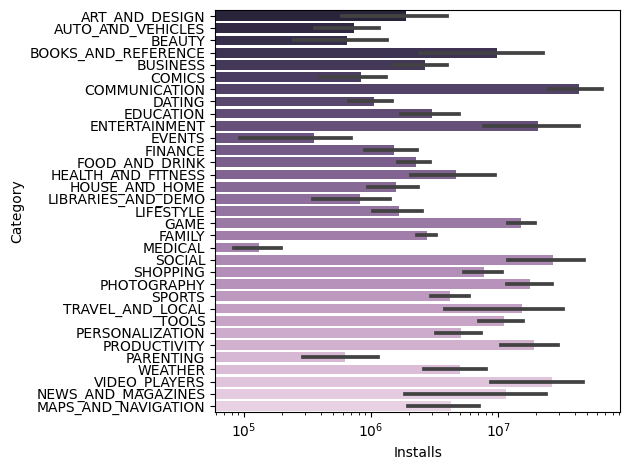

In [80]:
sns.barplot(x=apps.Installs, y=apps.Category)
plt.xscale('log')
plt.tight_layout()

In [81]:
apps.groupby('Category')['Installs'].mean().sort_values(ascending=False)

Category
COMMUNICATION          4.311813e+07
SOCIAL                 2.703370e+07
VIDEO_PLAYERS          2.653241e+07
ENTERTAINMENT          2.072216e+07
PRODUCTIVITY           1.924608e+07
PHOTOGRAPHY            1.767735e+07
TRAVEL_AND_LOCAL       1.548053e+07
GAME                   1.521794e+07
NEWS_AND_MAGAZINES     1.161329e+07
TOOLS                  1.114168e+07
BOOKS_AND_REFERENCE    9.856755e+06
SHOPPING               7.779620e+06
PERSONALIZATION        5.142124e+06
WEATHER                5.015229e+06
HEALTH_AND_FITNESS     4.688550e+06
MAPS_AND_NAVIGATION    4.264979e+06
SPORTS                 4.217044e+06
EDUCATION              2.990271e+06
FAMILY                 2.753408e+06
BUSINESS               2.650259e+06
FOOD_AND_DRINK         2.251891e+06
ART_AND_DESIGN         1.872674e+06
LIFESTYLE              1.673559e+06
HOUSE_AND_HOME         1.565839e+06
FINANCE                1.507657e+06
DATING                 1.051585e+06
COMICS                 8.320574e+05
LIBRARIES_AND_DEMO 

#### Вывод: Больше всего скачивают приложения для общения с другими людьми

### Самые популярные возрастные категории

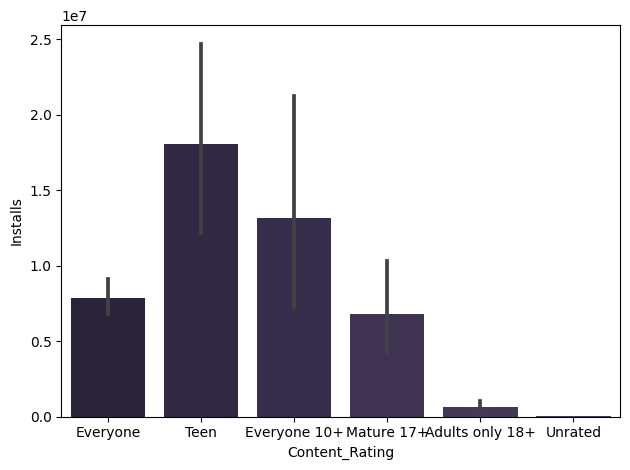

In [82]:
sns.barplot(data=apps, x='Content_Rating', y='Installs')
plt.tight_layout()

В среднем больше всего установок у приложений рейтинга Teen

Кол-во установок приложений Everyone и Mature 17+ отличаются не так уж сильно, учитывая, что Everyone составляет б<b>о</b>льшую часть всех приложений, а Mature 17+ совсем незначительную

#### Вывод: Приложения возрастной категории Teen значительно популярнее остальных

### Размер приложения и его рейтинг

<AxesSubplot: xlabel='Size_Mb', ylabel='Rating'>

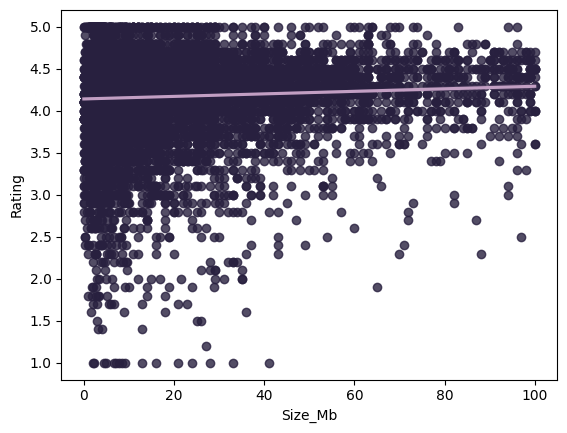

In [83]:
sns.regplot(x="Size_Mb", y="Rating",data=apps, line_kws={"color": "#c29fc3"})

<b>Порог значимости</b>: alpha = 0.05  
<b>Нулевая гипотеза</b>: Статистически значимая связь между переменными отсутствует

In [84]:
stats.spearmanr(apps.Size_Mb, apps.Rating)

SpearmanrResult(correlation=0.04775215256033189, pvalue=1.5260501638443366e-05)

Статистически значимая связь есть, но она, с моей точки зрения, незначительна и не несет никакой пользы (никто не будет искусственно увеличивать размер своего приложения в надежде на то, что рейтинг тоже вырастет)

Наиболее полезным замечанием может быть следующее: <b>Если увеличить размер своего приложения, его рейтинг не упадет</b>

### Размер приложения и его популярность

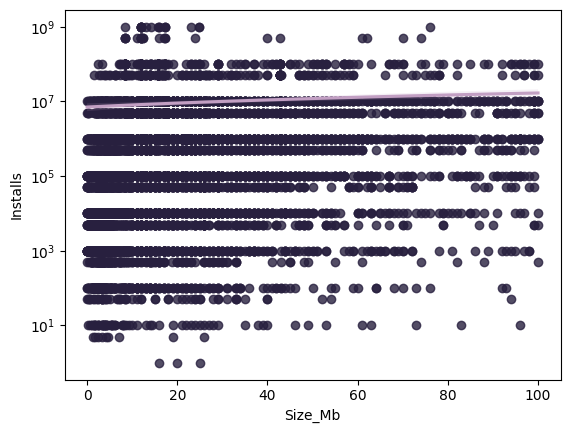

In [85]:
sns.regplot(x="Size_Mb", y="Installs",data=apps, line_kws={"color": "#c29fc3"})
plt.yscale('log')

<b>Порог значимости</b>: alpha = 0.05  
<b>Нулевая гипотеза</b>: Статистически значимая связь между переменными отсутствует

In [86]:
stats.spearmanr(apps.Size_Mb, apps.Installs)

SpearmanrResult(correlation=0.3165686800334853, pvalue=3.5420020811099504e-190)

#### Вывод: Размер приложения коррелирует с кол-вом его установок. Коэффициент корреляции Спирмена 0.32

## Главные инсайты:  
1. Популярность приложения не коррелирует с его рейтингом 
2. Платные приложения в среднем оцениваются выше  
3. Выше всего оценивают приложения категорий "События" и "Образование", ниже всего - дейтинговые приложения и карты  
4. Больше всего скачивают приложения для общения с другими людьми  
5. Больше всего скачивают приложения для возрастной категории "Подростки"  
6. Размер приложения не коррелирует с его рейтингом